In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reloading the module
import importlib

import mapping_funcs
importlib.reload(mapping_funcs)
from mapping_funcs import *

## $\Gamma_2$ and $\Gamma_4$ curved

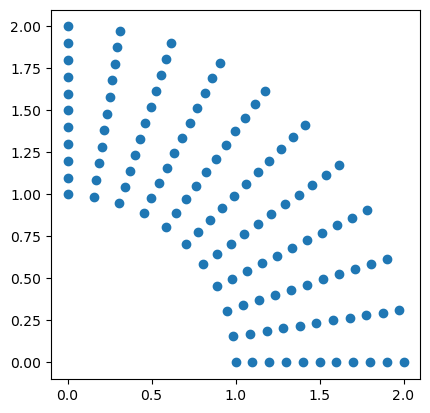

In [2]:
# A quarter of a ring
def BC2(t):
    # The parameterized expression for boundary 2
    # The boundary is a quarter of a circle of radius R, 0->pi/2
    # t: [-1,1]
    
    R = 2
    theta = (t+1) / 4 * np.pi 
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

def BC4(t):
    # The parameterized expression for boundary 4
    # The boundary is a quarter of a circle of radius R, 0->pi/2
    # t: [-1,1]
    
    R = 1
    theta = (t+1) / 4 * np.pi 
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve24(BC2, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

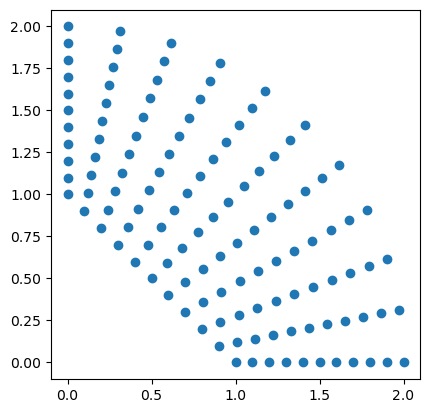

In [3]:
# BC2: a quarter of a circle
# Other BCs: straight lines
def BC2(t):
    # The parameterized expression for boundary 2
    # The boundary is a quarter of a circle of radius R, 0->pi/2
    # t: [-1,1]
    
    R = 2
    theta = (t+1) / 4 * np.pi 
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

def BC4(eta):
    # The parameterized expression for boundary 4
    # The boundary is a quarter of a circle of radius R, 0->pi/2
    # eta: [-1,1]
    
    R = 1
    x1 = np.array([R, 0])
    x4 = np.array([0, R])
    return (1-eta)/2 * x1 + (1+eta)/2 * x4

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve24(BC2, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

## All edges curved

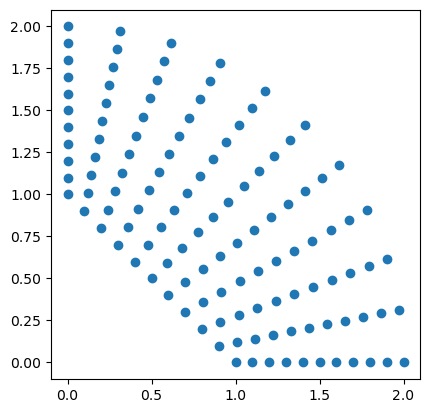

In [4]:
def BC_straight(t, x_start, x_end):
    # General computation of a straight boundary
    # x_start, x_end: 1D numpy arrays of length 2
    # t in [-1,1]
    return (1-t)/2 * x_start + (1+t)/2 * x_end

def BC1(t):
    # Straight line from (R1,0) to (R2,0)
    # t in [-1,1]
    R1 = 1
    R2 = 2
    x1 = np.array([R1,0])
    x2 = np.array([R2,0])
    return BC_straight(t, x1, x2)
    
    
def BC2(t):
    # The quarter of a circle of radius R, 0->pi/2
    # t: [-1,1]
    
    R = 2
    theta = (t+1)/4 * np.pi
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

def BC3(t):
    # Straight line from (0, R2) to (0, R1)
    # t in [-1,1]
    R1 = 1
    R2 = 2
    x4 = np.array([0, R1])
    x3 = np.array([0, R2])
    return BC_straight(t, x4, x3)

def BC4(t):
    # Straight line from (R, 0) to (0, R)
    # The boundary is a quarter of a circle of radius R, 0->pi/2
    # t: [-1,1]
    
    R = 1
    x1 = np.array([R, 0])
    x4 = np.array([0, R])
    
    return BC_straight(t, x1, x4)

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

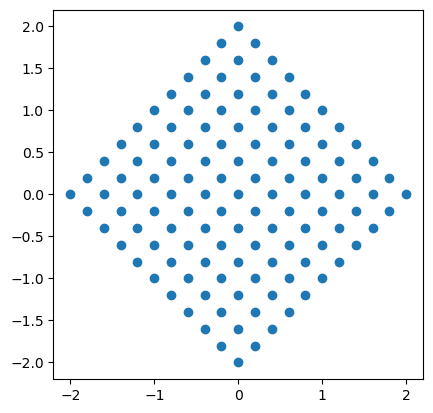

In [5]:
# All straight edges
def BC1(t):
    R = 2
    x1 = np.array([0,-R])
    x2 = np.array([R,0])
    return BC_straight(t, x1, x2)

def BC2(t):
    R = 2
    x2 = np.array([R,0])
    x3 = np.array([0,R])
    return BC_straight(t, x2, x3)

def BC3(t):
    R = 2
    x3 = np.array([0,R])
    x4 = np.array([-R,0])
    return BC_straight(t, x4, x3)

def BC4(t):
    R = 2
    x1 = np.array([0,-R])
    x4 = np.array([-R,0])
    return BC_straight(t, x1, x4)

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

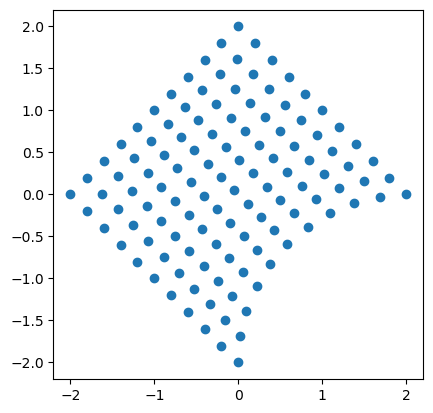

In [6]:
# Only BC1 curved 
def BC1(t):
    R = 2
    theta = -np.pi/4 * (t+1) + np.pi
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

def BC2(t):
    R = 2
    x2 = np.array([R,0])
    x3 = np.array([0,R])
    return BC_straight(t, x2, x3)

def BC3(t):
    R = 2
    x3 = np.array([0,R])
    x4 = np.array([-R,0])
    return BC_straight(t, x4, x3)

def BC4(t):
    R = 2
    x1 = np.array([0,-R])
    x4 = np.array([-R,0])
    return BC_straight(t, x1, x4)

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

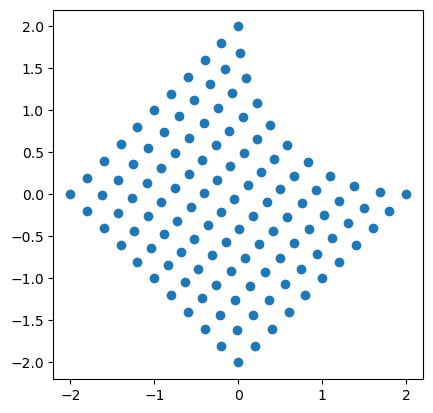

In [7]:
# Only BC2 curved 
def BC1(t):
    R = 2
    x1 = np.array([0,-R])
    x2 = np.array([R,0])
    return BC_straight(t, x1, x2)

def BC2(t):
    R = 2
    theta = -np.pi/4 * (t-1) + np.pi
    x = R + R*np.cos(theta)
    y = R + R*np.sin(theta)
    return np.array([x,y])

def BC3(t):
    R = 2
    x3 = np.array([0,R])
    x4 = np.array([-R,0])
    return BC_straight(t, x4, x3)

def BC4(t):
    R = 2
    x1 = np.array([0,-R])
    x4 = np.array([-R,0])
    return BC_straight(t, x1, x4)

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

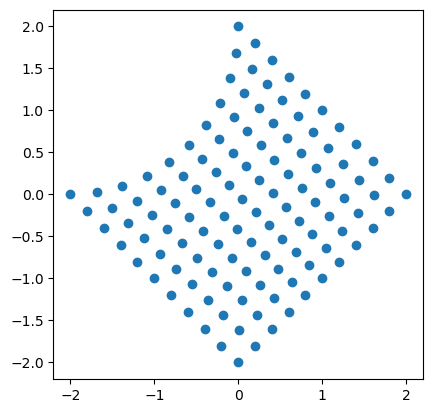

In [8]:
# Only BC3 curved 
def BC1(t):
    R = 2
    x1 = np.array([0,-R])
    x2 = np.array([R,0])
    return BC_straight(t, x1, x2)

def BC2(t):
    R = 2
    x2 = np.array([R,0])
    x3 = np.array([0,R])
    return BC_straight(t, x2, x3)

def BC3(t):
    R = 2
    theta = np.pi/4 * (t-1)
    x = -R + R*np.cos(theta)
    y = R + R*np.sin(theta)
    return np.array([x,y])

def BC4(t):
    R = 2
    x1 = np.array([0,-R])
    x4 = np.array([-R,0])
    return BC_straight(t, x1, x4)

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

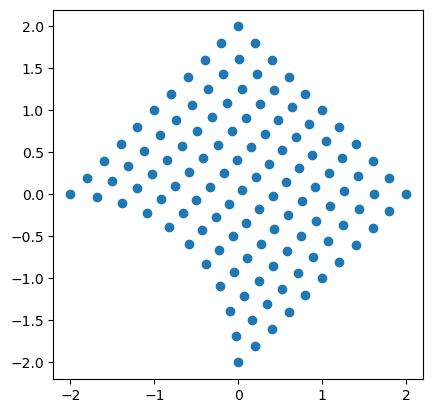

In [9]:
# Only BC4 curved
def BC1(t):
    R = 2
    x1 = np.array([0,-R])
    x2 = np.array([R,0])
    return BC_straight(t, x1, x2)

def BC2(t):
    R = 2
    x2 = np.array([R,0])
    x3 = np.array([0,R])
    return BC_straight(t, x2, x3)

def BC3(t):
    R = 2
    x3 = np.array([0,R])
    x4 = np.array([-R,0])
    return BC_straight(t, x4, x3)

def BC4(t):
    R = 2
    theta = np.pi/4 * (t+1)
    x = -R + R*np.cos(theta)
    y = -R + R*np.sin(theta)
    return np.array([x,y])

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')

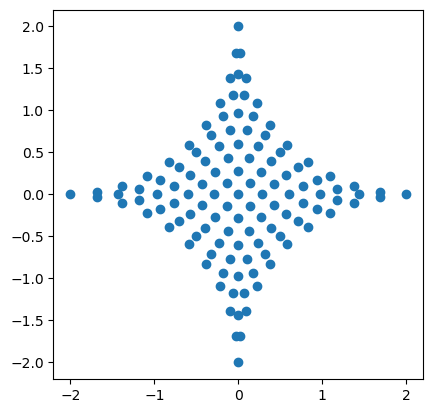

In [10]:
# All edges curved
def BC1(t):
    R = 2
    theta = -np.pi/4 * (t+1) + np.pi
    x = R*np.cos(theta)
    y = R*np.sin(theta)
    return np.array([x,y])

def BC2(t):
    R = 2
    theta = -np.pi/4 * (t-1) + np.pi
    x = R + R*np.cos(theta)
    y = R + R*np.sin(theta)
    return np.array([x,y])

def BC3(t):
    R = 2
    theta = np.pi/4 * (t-1)
    x = -R + R*np.cos(theta)
    y = R + R*np.sin(theta)
    return np.array([x,y])

def BC4(t):
    R = 2
    theta = np.pi/4 * (t+1)
    x = -R + R*np.cos(theta)
    y = -R + R*np.sin(theta)
    return np.array([x,y])

# Testing the map
# Grid points in the compuational domain
a_grid = np.linspace(-1,1,11)
b_grid = np.linspace(-1,1,11)
# Grid points in the physical domain
x_grid = []
y_grid = []
for a in a_grid:
    for b in b_grid:
        image = QuadMap_Curve(BC1, BC2, BC3, BC4, a, b)
        x_grid.append(image[0])
        y_grid.append(image[1])

# Plot the grid points
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(x_grid, y_grid)
ax.set_aspect('equal')